In [0]:
import numpy as np
import math  
### Dense layers will be crate each and every input will be connected to other layer each activation function
class Layer:
  def __init__(self,inputs,activ_function="sigmoid",number_of_activation=4):
    self.activ_function=activ_function
    self.activation_unit = number_of_activation
    self.input = inputs
    self.unit_output ={} 
    return None;
  
  def buildLayer(self):
    
    if isinstance(self.input, Layer):
      inputs =self.input
      layer_inputs=None
      for i in range(len(inputs.unit_output)):
        input_ = np.array(inputs.unit_output[i])[np.newaxis]
        input_ = input_.T
        if layer_inputs is not None:
          layer_inputs=np.concatenate((layer_inputs,input_),axis=1)
        else:
          layer_inputs=input_
      self.input_size = layer_inputs.shape[0]
      self.input_feature = layer_inputs.shape[1]
      self.input = layer_inputs
    else:
      self.input_size = self.input.shape[0]  # this can we more than 1 if batch size more than 1
      self.input_feature = self.input.shape[1]
      ##
    ########################################   
    self.w_i={}
    for i in range(self.activation_unit):
      w = self.__init_w(self.input_feature)
      w_i = self.weighted_input(self.input,w)
      self.w_i[i] = w_i
      self.unit_output[i]=self.activate(w_i,activation=self.activ_function)
      
    
  def activate(self,weighted_input,activation="sigmoid"):
    if activation=="linear":
      return [self.linear_function(d_i) for d_i  in weighted_input]
    elif activation == 'sigmoid':
      return [self.sigmoid(d_i) for d_i  in weighted_input]
    
  def sigmoid(self,x):
    return 1 / (1 + math.exp(-x))
  
  def linear_function(self,x):
    return x  #identity function used for linear activation
  
  def weighted_input(self,input,weight):
    return input.dot(weight);
  
  def __init_w(self,D):
    return np.random.randn(D)

In [0]:
### random generate input array
# the netwro i develop dosen't support backpropogation now
# just you can add layers and activation function 
# feed forward onlyt
# no error will be calcuated
# no gradient calculation
# just normal netwrok

i_input = np.random.randn(200,9)
# 30 row and 9 feature
# batch size is 300
i_input[:2]  # to check just take row and 4 feature

array([[-1.05181033, -1.31824198,  1.19005519,  0.31701606,  1.56666968,
        -1.14621938,  0.0762828 , -1.25246688,  1.73034992],
       [ 1.31851542,  1.04218301,  0.24077001, -0.07358121,  1.18230967,
         0.90528984, -0.64754503,  1.16351629, -0.46713731]])

In [0]:
#we we will add 5 activation unit in first layer
sig_layer1 = Layer(i_input,activ_function='sigmoid',number_of_activation=5)
sig_layer1.buildLayer()
#
sig_layer2 =Layer(sig_layer1,activ_function='sigmoid',number_of_activation=3) # i have given inputs of first layer
sig_layer2.buildLayer()
#
sig_layer3 =Layer(sig_layer2,activ_function='sigmoid',number_of_activation=2) # i have given inputs of first layer
sig_layer3.buildLayer()

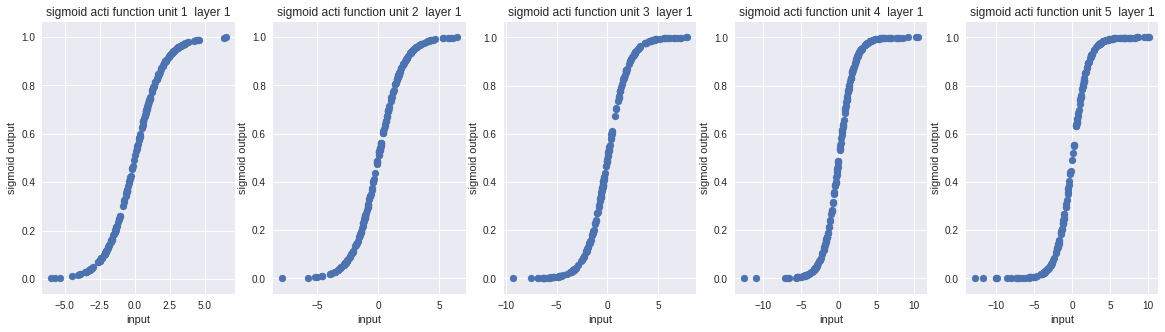

In [0]:
from matplotlib import pyplot as plt

fig, ax =plt.subplots(1,sig_layer1.activation_unit,figsize=(20,5))

for i in range(sig_layer1.activation_unit):
  ax[i].scatter(sig_layer1.w_i[i],sig_layer1.unit_output[i])
  ax[i].set_xlabel('input')
  ax[i].set_ylabel('sigmoid output')
  ax[i].set_title('sigmoid acti function unit {0}  layer {1}'.format(i+1,1))  
plt.show()

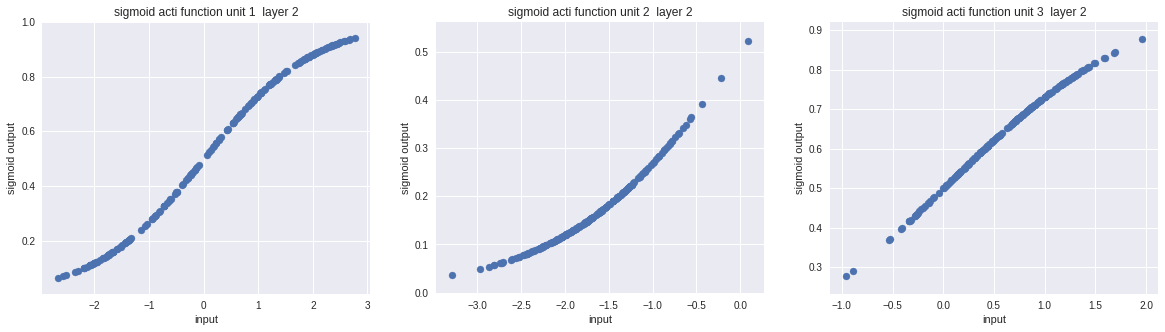

In [0]:
fig, ax =plt.subplots(1,sig_layer2.activation_unit,figsize=(20,5))

for i in range(sig_layer2.activation_unit):
  ax[i].scatter(sig_layer2.w_i[i],sig_layer2.unit_output[i])
  ax[i].set_xlabel('input')
  ax[i].set_ylabel('sigmoid output')
  ax[i].set_title('sigmoid acti function unit {0}  layer {1}'.format(i+1,2))  
plt.show()

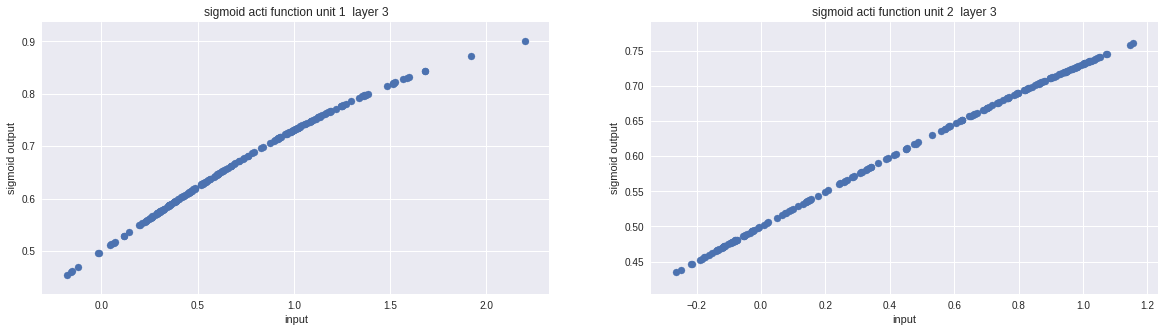

In [0]:
fig, ax =plt.subplots(1,sig_layer3.activation_unit,figsize=(20,5))

for i in range(sig_layer3.activation_unit):
  ax[i].scatter(sig_layer3.w_i[i],sig_layer3.unit_output[i])
  ax[i].set_xlabel('input')
  ax[i].set_ylabel('sigmoid output')
  ax[i].set_title('sigmoid acti function unit {0}  layer {1}'.format(i+1,3))  
plt.show()

In [0]:
lin_layer1=Layer(i_input,activ_function='linear',number_of_activation=5)
lin_layer1.buildLayer()
#
lin_layer2=Layer(lin_layer1,activ_function='linear',number_of_activation=3)
lin_layer2.buildLayer()
#
lin_layer3=Layer(lin_layer2,activ_function='linear',number_of_activation=2)
lin_layer3.buildLayer()

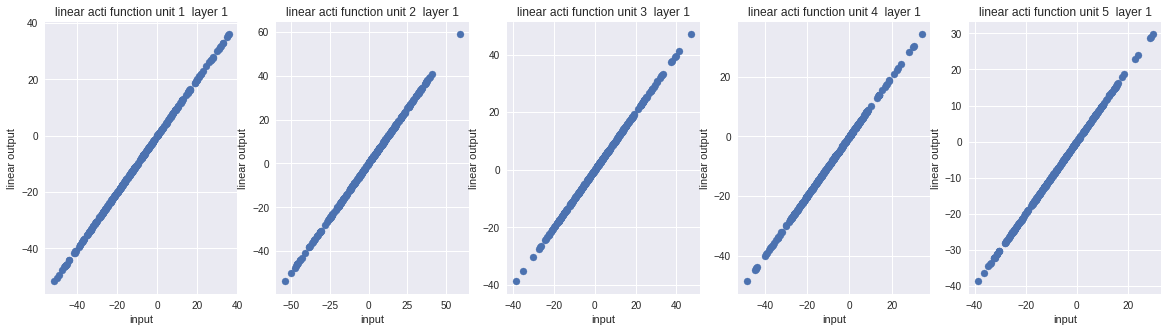

In [0]:
from matplotlib import pyplot as plt

fig, ax =plt.subplots(1,lin_layer1.activation_unit,figsize=(20,5))

for i in range(lin_layer1.activation_unit):
  ax[i].scatter(lin_layer1.w_i[i],lin_layer1.unit_output[i])
  ax[i].set_xlabel('input')
  ax[i].set_ylabel('linear output')
  ax[i].set_title('linear acti function unit {0}  layer {1}'.format(i+1,1))  
plt.show()

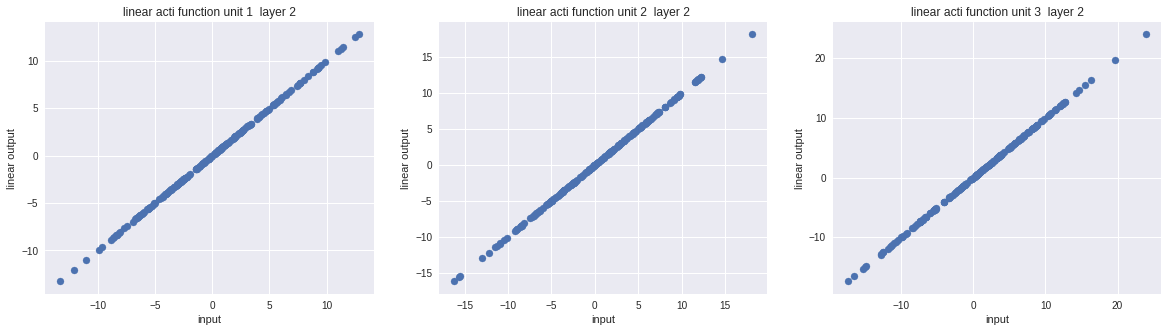

In [0]:
fig, ax =plt.subplots(1,lin_layer2.activation_unit,figsize=(20,5))

for i in range(lin_layer2.activation_unit):
  ax[i].scatter(lin_layer2.w_i[i],lin_layer2.unit_output[i])
  ax[i].set_xlabel('input')
  ax[i].set_ylabel('linear output')
  ax[i].set_title('linear acti function unit {0}  layer {1}'.format(i+1,2))  
plt.show()

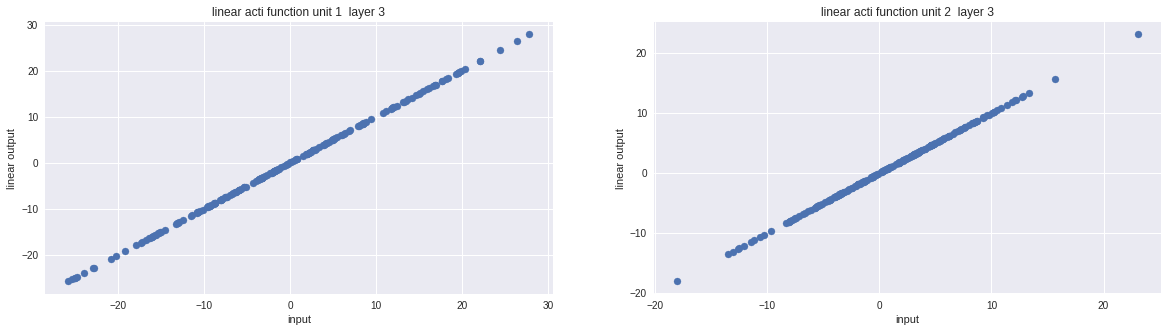

In [0]:
fig, ax =plt.subplots(1,lin_layer3.activation_unit,figsize=(20,5))

for i in range(lin_layer3.activation_unit):
  ax[i].scatter(lin_layer3.w_i[i],lin_layer3.unit_output[i])
  ax[i].set_xlabel('input')
  ax[i].set_ylabel('linear output')
  ax[i].set_title('linear acti function unit {0}  layer {1}'.format(i+1,3))  
plt.show()